In [1]:
#TP1

In [2]:
#1
import numpy as np
tab = np.zeros((8,8))
tab[1::2,::2] = 1
tab[::2,1::2] = 1
tab


array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

In [3]:
#2
vec = np.arange(1,21)
mat = vec.reshape(5,4).transpose()
mat[[1,2,0],:][:,[1,4,2]]

array([[ 6, 18, 10],
       [ 7, 19, 11],
       [ 5, 17,  9]])

In [4]:
import matplotlib.pyplot as plt

#Question 3. — Définir un array x contenant m = 15 réels tirés uniformément sur [−1, 1]. On pourra utiliser la
fonction np.random.random_sample.

#Question 4. — Définir un array y contenant les valeurs (Yi)i∈[m] définies selon (2.2). On pourra faire appel à la
fonction np.random.randn.

#Question 5. — Visualiser dans le plan les données obtenues (Xi, Yi)i∈[m] sous la forme de points bleus.

#Question 6. — Avec le même procédé, générer un échantillon de test (X0i, Y 0i)i∈[m0] de taille m0 = 30 qu’on stockera dans des array x_test et y_test.

In [5]:
#3
m = 15
x = -1 + 2*np.random.random_sample(m)
x

array([ 0.105642  ,  0.21498722,  0.0704566 , -0.4809765 ,  0.80450348,
       -0.30365608, -0.69211204, -0.61086714,  0.45018707,  0.7313946 ,
       -0.64199237,  0.11096326,  0.46814695, -0.91439715,  0.68099232])

In [6]:
#4
def g(x):
    return(3/2*x**3-x**2-3/4*x+1)
y = g(x)+1/20*np.random.randn(m)

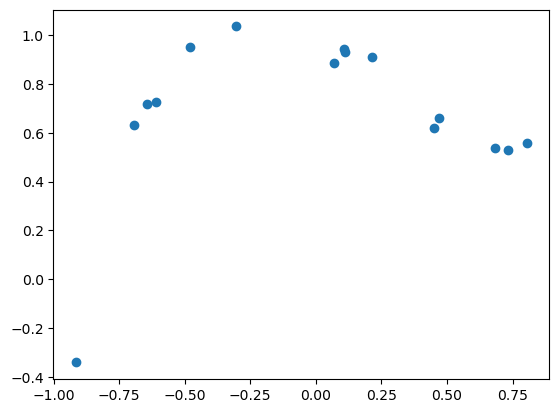

In [7]:
#5
plt.scatter(x,y)

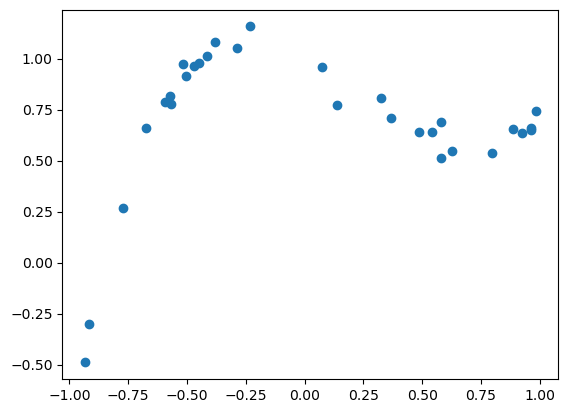

In [8]:
#6
m_test = 30
x_test = -1 + 2*np.random.random_sample(m_test)
y_test = g(x_test) + 1/20*np.random.randn(m_test)
plt.scatter(x_test, y_test)

In [9]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()

#Question 7. — Produire une figure qui superpose aux points (Xi, Yi)i∈[m] la droite correspondant au graphe du prédicteur ˆf.

#Question 8. — Calculer l’erreur moyenne d’apprentissage ainsi que l’erreur moyenne de test. Commenter.

**soit f^ une fonction**

√n (1/n∑l(f(Xi),Yi) - E[l(f(X),Y)]) --> N(0, V)

donc 1/n∑l(f(Xi),Yi) ≈ E[l(f(X),Y)] à 1/√30 près

In [10]:
#7
X = x[:,np.newaxis]
X_test = x_test[:,np.newaxis]

In [11]:
f.fit(X,y)
res = f.predict(X)

Text(0.5, 1.0, "f^ entrainée sur l'échantillon train")

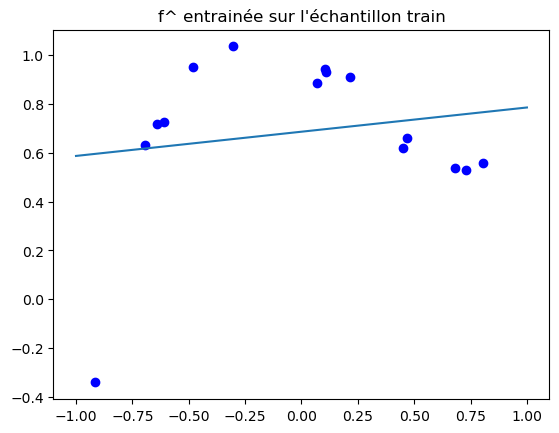

In [12]:
xplot = np.linspace(-1,1,500).reshape(-1,1)
plt.plot(x,y,'bo')
plt.plot(xplot,f.predict(xplot))
plt.title("f^ entrainée sur l'échantillon train")

In [13]:
#erreur d'entrainement
print("erreur d'entrainement : ", sum(1/m*(y-f.predict(X))**2))

erreur d'entrainement :  0.0992095967717193


In [14]:
#erreur de test
print("erreur de test : ", sum(1/m_test*(y_test-f.predict(X_test))**2))

erreur de test :  0.1212040873480917


#Question 9. — On souhaite dans cette question calculer le prédicteur ˆf pour n = 2. Nous allons implémenter la fonction ψ introduite ci-dessus à l’aide d’outils fournis par scikit-learn.

a) Calculer le prédicteur ˆf en faisant intervenir LinearRegression().

b) Superposer le graphe de ˆf aux points représentant les données d’apprentissage.

c) Calculer les erreurs moyennes d’apprentissage et de test, et les comparer aux erreurs obtenues dans la section
précédente.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
#9
#a
psi = PolynomialFeatures(2,include_bias=False).fit_transform
f.fit(psi(X),y)

LinearRegression()

Text(0.5, 1.0, "f^obtenue à partir de l'échantillon train")

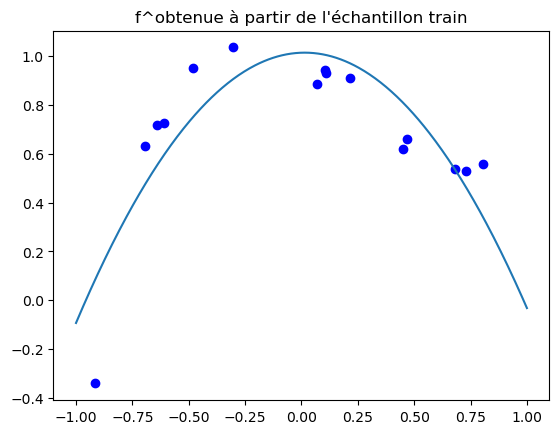

In [17]:
#b
plt.plot(x,y,'bo')
plt.plot(xplot,f.predict(psi(xplot)))
plt.title("f^obtenue à partir de l'échantillon train")

In [18]:
#erreur d'entrainement
sum(1/m*(y-f.predict(psi(X)))**2)

0.029563988328040983

In [19]:
#erreur de test
sum(1/m_test*(y_test-f.predict(psi(X_test)))**2)

0.09385954732657055

#Question 10. — On souhaite à présent généraliser le calcul à tout n > 1 (qui correspond au degré maximal des
polynômes).

a) En s’inspirant de la question précédente, écrire une fonction qui prend en argument l’entier n, et qui renvoie
deux éléments: le prédicteur ˆf et la fonction ψ.

b) Calculer le prédicteur pour n ∈ {3, 4, 13, 14} et le visualiser (on pourra si besoin spécifier des limites pour
l’abscisse).

c) Pour n = 3, comparer les coefficients du prédicteur avec ceux de la fonction g qui a généré les données.

d) Que se passe-t-il pour n = 14?

e) Tracer une figure avec en abscisse n = 1, . . . , 14, et en ordonnée les graphes des erreurs moyennes d’apprentissage et de test. Commenter.

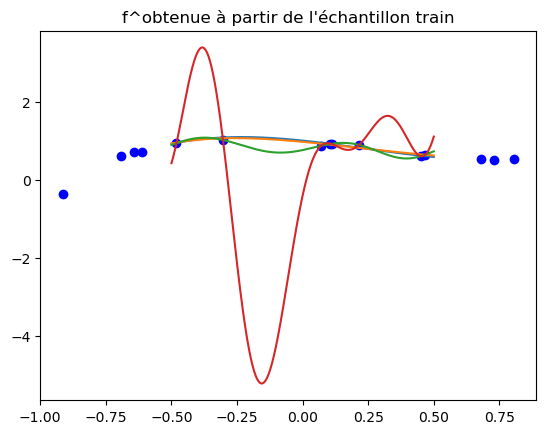

In [20]:
#a
def predicteur(n):
    psi = PolynomialFeatures(n,include_bias=False).fit_transform
    return LinearRegression().fit(psi(X),y), psi

#b
N = [3,4,13,14]
plt.plot(x,y,'bo')
plt.title("f^obtenue à partir de l'échantillon train")
xplot = np.linspace(-0.5,0.5,500).reshape(-1,1)

for n in N:
    f, psi = predicteur(n)
    plt.plot(xplot,f.predict(psi(xplot)))


In [21]:
#c 
f, psi = predicteur(3)
print("coeffs : ", f.coef_)
print("intercept : ", f.intercept_)
print("coeffs de g : -0.75, -1, 1.5")
print("intercept de g : 1")


coeffs :  [-0.70234142 -0.995963    1.45796363]
intercept :  1.017234333732742
coeffs de g : -0.75, -1, 1.5
intercept de g : 1


In [22]:
#d pour n = 14, on passe par tous les points (interpolation de Lagrange)

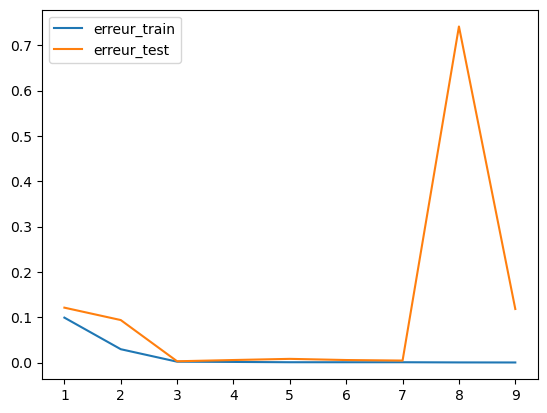

In [25]:
N = np.arange(1,15)
erreur_train = []
erreur_test = []

for n in N:
    f, psi = predicteur(n)
    erreur_train.append(sum(1/m*(y-f.predict(psi(X)))**2))
    erreur_test.append(sum(1/m_test*(y_test-f.predict(psi(X_test)))**2))

plt.plot(N[0:9], erreur_train[0:9])
plt.plot(N[0:9], erreur_test[0:9])
plt.legend(["erreur_train","erreur_test"])


- trouver le min de la U curve
- choisir un modèle interprétable : modèle qui raconte une histoire, mettre en contexte ce qui se passe (vous avez telles caracteristiques, je donne les crédits à tel type de personne donc blablabla et donner la manière dont marche l'algo et permet de savoir comment avoir un autre résultat 
